In [1]:
from ipywidgets import interact,interactive,fixed
import ipywidgets as widgets

In [6]:
def func(x):
    return x

In [12]:
interact(func,x='hello')

interactive(children=(Text(value='hello', description='x'), Output()), _dom_classes=('widget-interact',))

<function __main__.func(x)>

In [16]:
@interact(x=True,y=fixed(1.0))
def g(x,y):
    return(x,y)

interactive(children=(Checkbox(value=True, description='x'), Output()), _dom_classes=('widget-interact',))

In [18]:
interact(func,x=widgets.IntSlider(min=-100,max=100,step=1,value = 0))

interactive(children=(IntSlider(value=0, description='x', min=-100), Output()), _dom_classes=('widget-interact…

<function __main__.func(x)>

In [19]:
interact(func,x=(-10,10,1))

interactive(children=(IntSlider(value=0, description='x', max=10, min=-10), Output()), _dom_classes=('widget-i…

<function __main__.func(x)>

In [20]:
@interact(x=(0.0,20.0,0.5))
def h(x=5.0):
    return x

interactive(children=(FloatSlider(value=5.0, description='x', max=20.0, step=0.5), Output()), _dom_classes=('w…

In [22]:
interact(func,x=['hello','option 2', 'option3'])

interactive(children=(Dropdown(description='x', options=('hello', 'option 2', 'option3'), value='hello'), Outp…

<function __main__.func(x)>

In [23]:
interact(func,x={'one':10,'two':20})

interactive(children=(Dropdown(description='x', options={'one': 10, 'two': 20}, value=10), Output()), _dom_cla…

<function __main__.func(x)>

In [24]:
from IPython.display import display

def f(a,b):
    display (a+b)
    return a + b

In [25]:
w = interactive(f,a=10,b=20)

In [26]:
type(w)

ipywidgets.widgets.interaction.interactive

In [28]:
display(w)

interactive(children=(IntSlider(value=10, description='a', max=30, min=-10), IntSlider(value=20, description='…

In [29]:
import ipywidgets as widgets

In [30]:
w = widgets.IntSlider()

In [32]:
from IPython.display import display

In [33]:
display(w)

IntSlider(value=0)

In [34]:
w.close()

In [35]:
display(w)

IntSlider(value=30)

In [36]:
w = widgets.IntSlider()

In [37]:
display(w)

IntSlider(value=0)

In [38]:
w.value

30

In [39]:
w.value  = 50

In [40]:
w.keys

['_dom_classes',
 '_model_module',
 '_model_module_version',
 '_model_name',
 '_view_count',
 '_view_module',
 '_view_module_version',
 '_view_name',
 'continuous_update',
 'description',
 'description_tooltip',
 'disabled',
 'layout',
 'max',
 'min',
 'orientation',
 'readout',
 'readout_format',
 'step',
 'style',
 'value']

In [41]:
w.max = 2000

In [46]:
a = widgets.FloatText()
b = widgets.FloatSlider()

display(a,b)

mylink = widgets.jslink((a,'value'),(b,'value'))

FloatText(value=0.0)

FloatSlider(value=0.0)

In [43]:
display(a)

FloatText(value=0.0)

In [44]:
a.value

15.333

In [47]:
mylink.unlink()

In [50]:
import ipywidgets as widgets
from IPython.display  import display

In [51]:
w = widgets.IntSlider()
display(w)

IntSlider(value=0)

In [53]:
w.layout.margin = 'auto'
w.layout.height = '75px'

In [54]:
w = widgets.IntSlider(value = 15,description = 'New Slider')
display(w)

IntSlider(value=15, description='New Slider')

In [56]:
widgets.Button(description='Ordinary Button',button_style = 'Info')

Button(button_style='info', description='Ordinary Button', style=ButtonStyle())

In [65]:
b1 = widgets.Button(description='Custom Color')
b1.style.button_color = 'lightgreen'
b1

Button(description='Custom Color', style=ButtonStyle(button_color='lightgreen'))

In [66]:
b2 = widgets.Button(description="NEW")
b2.style = b1.style
b2

Button(description='NEW', style=ButtonStyle(button_color='lightgreen'))

In [68]:
s1 = widgets.IntSlider(description='My handle')
s1.style.handle_color = 'blue'
s1

IntSlider(value=0, description='My handle', style=SliderStyle(handle_color='blue'))

In [69]:
import traitlets
a = widgets.IntSlider(description="Delayed", continuous_update=False)
b = widgets.IntText(description="Delayed", continuous_update=False)
c = widgets.IntSlider(description="Continuous", continuous_update=True)
d = widgets.IntText(description="Continuous", continuous_update=True)

traitlets.link((a, 'value'), (b, 'value'))
traitlets.link((a, 'value'), (c, 'value'))
traitlets.link((a, 'value'), (d, 'value'))
widgets.VBox([a,b,c,d])

In [70]:
%matplotlib inline

In [71]:
from ipywidgets import interact, interactive
from IPython.display import clear_output, display, HTML

In [72]:
import numpy as np
from scipy import integrate

from matplotlib import pyplot as plt
from mpl_toolkits.mplot3d import Axes3D
from matplotlib.colors import cnames
from matplotlib import animation

In [73]:
def solve_lorenz(N=10, angle=0.0, max_time=4.0, sigma=10.0, beta=8./3, rho=28.0):

    fig = plt.figure();
    ax = fig.add_axes([0, 0, 1, 1], projection='3d');
    ax.axis('off')

    # prepare the axes limits
    ax.set_xlim((-25, 25))
    ax.set_ylim((-35, 35))
    ax.set_zlim((5, 55))
    
    def lorenz_deriv(x_y_z, t0, sigma=sigma, beta=beta, rho=rho):
        """Compute the time-derivative of a Lorenz system."""
        x, y, z = x_y_z
        return [sigma * (y - x), x * (rho - z) - y, x * y - beta * z]

    # Choose random starting points, uniformly distributed from -15 to 15
    np.random.seed(1)
    x0 = -15 + 30 * np.random.random((N, 3))

    # Solve for the trajectories
    t = np.linspace(0, max_time, int(250*max_time))
    x_t = np.asarray([integrate.odeint(lorenz_deriv, x0i, t)
                      for x0i in x0])
    
    # choose a different color for each trajectory
    colors = plt.cm.jet(np.linspace(0, 1, N));

    for i in range(N):
        x, y, z = x_t[i,:,:].T
        lines = ax.plot(x, y, z, '-', c=colors[i])
        _ = plt.setp(lines, linewidth=2);

    ax.view_init(30, angle)
    _ = plt.show();

    return t, x_t

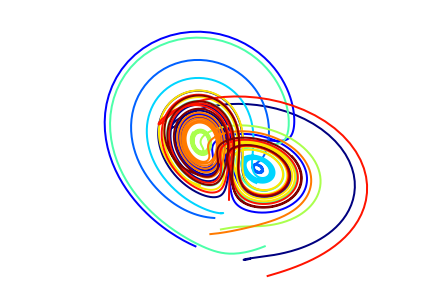

In [74]:
t, x_t = solve_lorenz(angle=0, N=10)

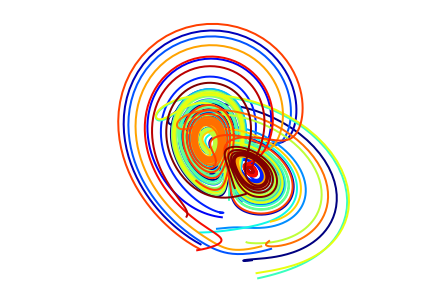

In [75]:
t, x_t = solve_lorenz(angle=10, N=20)

In [77]:
xyz_avg = x_t.mean(axis=1)

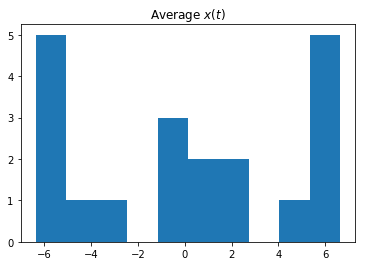

In [78]:
plt.hist(xyz_avg[:,0])
plt.title('Average $x(t)$');